
# 초급 딥러닝 미션: "인공지능 마법사의 첫 번째 신경망"

## 🎯 학습 목표
- 딥러닝 및 파이토치 기본 개념 이해
- 텐서 생성 및 조작
- `nn.Module` 기반 모델 작성
- 시퀀셜 모델 구성
- 손실함수, 옵티마이저, 학습 루프 직접 구현
- 정확도 등 메트릭 계산 및 시각화



## 📂 사용 데이터셋
**MNIST 손글씨 숫자 이미지** (10개 숫자 분류, 흑백 이미지)  
👉 `torchvision.datasets.MNIST`에서 자동 다운로드 가능



## 🧩 미션 구성

### Part 1. 딥러닝과 파이토치 개요  
❓ 문제 1  
**딥러닝이 머신러닝과 다른 점은 무엇인가요?**  
✔️ 정답: 특징 추출과 분류를 동시에 자동 학습 가능하다.

❓ 문제 2  
**파이토치의 핵심 구성 요소 3가지를 쓰세요.**  
✔️ 정답: Tensor, Autograd, Module



### Part 2. 텐서 연산 실습  
🔧 실습 문제 3  
아래 조건에 맞는 텐서를 생성하세요:  
- 3x3 크기의 정규분포 난수 텐서
- 모든 원소에 대해 ReLU 함수를 적용한 텐서

힌트: `torch.randn`, `torch.relu`


In [1]:
!pip install torch

In [2]:
import torch
from torchvision.datasets import MNIST

In [3]:
# Create a 3x3 tensor with random values from a normal distribution
tensor = torch.randn(3, 3)
print(tensor)

tensor_relu = torch.relu(tensor)
print(tensor_relu)

tensor([[-0.1065, -1.5277,  0.9730],
        [-0.0482,  0.4950,  0.0349],
        [ 1.2314,  1.1349,  0.5046]])
tensor([[0.0000, 0.0000, 0.9730],
        [0.0000, 0.4950, 0.0349],
        [1.2314, 1.1349, 0.5046]])



### Part 3. 신경망 직접 만들기  
🔧 실습 문제 4  
다음과 같은 신경망을 `nn.Module` 클래스를 상속받아 구현하세요:

- 입력: 28×28 이미지 → 784차원
- 은닉층: 128개 뉴런, 활성화 함수 ReLU
- 출력층: 10개 뉴런, 소프트맥스


In [4]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)   
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x  


### Part 4. 시퀀셜 모델 구성  
🔧 실습 문제 5  
동일한 구조를 `nn.Sequential`을 사용하여 작성하세요.

힌트: `nn.Sequential(...)`


In [5]:
sequential_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [6]:
sequential_model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

### Part 5. 손실함수와 옵티마이저  
🔧 실습 문제 6  
다음 코드에서 손실함수와 옵티마이저를 정의하세요:

```python
model = MyNet()
# 손실 함수 정의
# 옵티마이저 정의
```

요구사항:
- 손실 함수: `CrossEntropyLoss`
- 옵티마이저: `SGD`, 학습률 0.01


In [7]:
import torch.optim as optim

model = MyNet()

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [8]:
print(model)
print(criterion)
print(optimizer)

MyNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)



### Part 6. 데이터셋 및 데이터로더  
🔧 실습 문제 7  
`torchvision.datasets.MNIST`를 사용하여 학습 및 검증 데이터를 불러오고, `DataLoader`를 사용하여 배치 사이즈 64로 나누세요.


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%



### Part 7. 학습 루프 구현하기  
🔧 실습 문제 8  
기본적인 학습 루프를 구현하세요. 다음을 포함해야 합니다:
- 배치 단위 데이터 가져오기
- 예측값 계산 (`model(x)`)
- 손실 계산 및 역전파
- 파라미터 업데이트


In [10]:
for epoch in range(1):
    for images, labels in train_loader:
        optimizer.zero_grad()  # 기울기 초기화
        output = model(images)  # 모델에 입력
        loss = criterion(output, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
    print(f'Epoch {epoch+1} 완료')


Epoch 1 완료



### Part 8. 정확도(Accuracy) 계산  
🔧 실습 문제 9  
모델이 얼마나 잘 맞췄는지 정확도를 직접 계산하는 함수를 작성하세요.


In [11]:
def evaluate_model(model, test_loader):
    model.eval()  # 평가 모드로 전환
    correct = 0
    total = 0

    with torch.no_grad():  # 기울기 계산 비활성화
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total
acc = evaluate_model(model, test_loader)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 86.38%



### Part 9. 학습 과정 시각화  
🔧 실습 문제 10  
에폭별 손실값을 저장하고 `matplotlib`을 이용해 학습 곡선을 시각화하세요.


In [14]:
!pip install matplotlib

Epoch 1 Loss: 1.2703
Epoch 2 Loss: 0.4998
Epoch 3 Loss: 0.3965
Epoch 4 Loss: 0.3554
Epoch 5 Loss: 0.3308


C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44

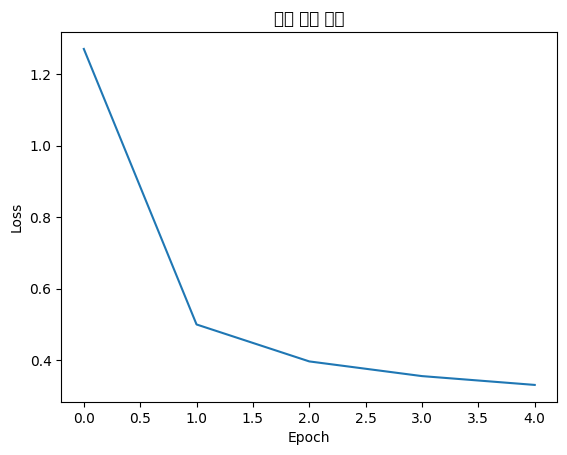

In [15]:
import matplotlib.pyplot as plt

model = MyNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
losses = []

model.train()
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("학습 손실 곡선")
plt.show()


C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27160\4074900138.py:16: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27160\4074900138.py:16: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27160\4074900138.py:16: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wjdgn\AppData\Local\Temp\ipykernel_27160\4074900138.py:16: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wjdgn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools

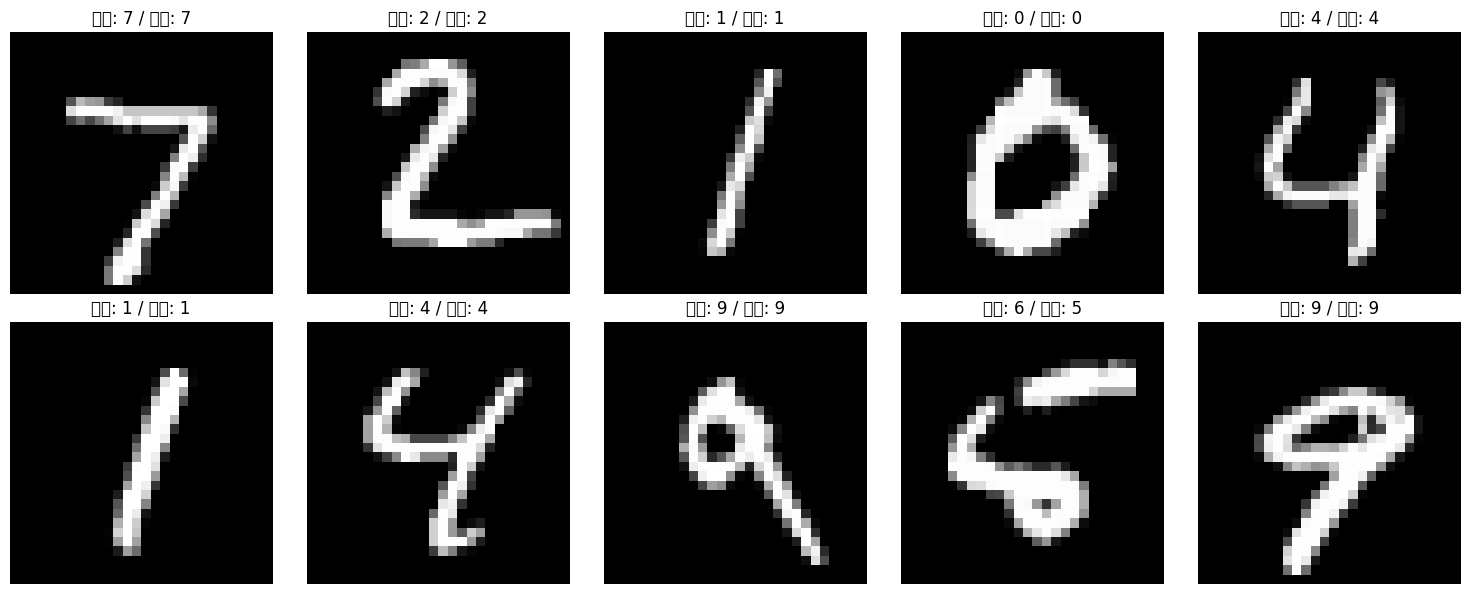

In [16]:
model.eval()
images, labels = next(iter(test_loader))
images, labels = images[:10], labels[:10]

with torch.no_grad():
    outputs = model(images)
    probs = torch.softmax(outputs, dim=1)
    preds = torch.argmax(probs, dim=1)

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"예측: {preds[i].item()} / 실제: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()



## 🎁 보너스 미션  
- `nn.Module`과 `nn.Sequential` 방식의 모델을 비교  
- 옵티마이저를 Adam으로 바꾸고 학습 결과 비교  
- 은닉층 크기를 256으로 변경하여 과적합 여부 확인
